### Gausian Distribution
---

It is helpful when data is Gaussian or when we assume a Gaussian distribution for calculating statistics. This is because the Gaussian distribution is very well understood. So much so that large parts of the field of statistics are dedicated to methods for this distribution.

The following code generates and plots the 'normal' distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

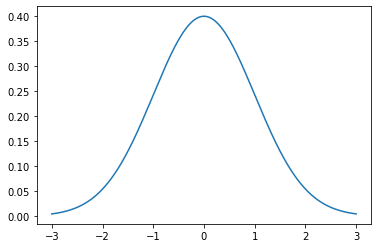

In [3]:
x_axis = np.arange(-3, 3, 0.001)
y_axis = norm.pdf(x_axis, 0, 1)
plt.plot(x_axis, y_axis);

- **Data Sample**: A subset of observations from a group.
- **Data Population**: All possible observations from a group.

Generate some test data. Then scale these numbers to a Gaussian of our choosing. 

Make this consistent by adding the desired mean (50) and multiplying by the standard deviation (5). 

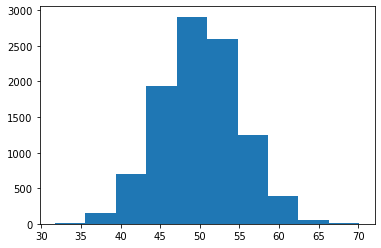

In [4]:
np.random.seed(1)
data = 5 * np.random.randn(10000) + 50
plt.hist(data);

We can almost see the Gaussian shape to the data, but it is blocky. 

This highlights an important point...

Sometimes, the data will not be a perfect Gaussian, but it will have a Gaussian-like distribution. 

Often, we can treat it as Gaussian and use all of the same statistical tools and get reliable results.

Changing the amount of bins make it appear more guassion (for example)

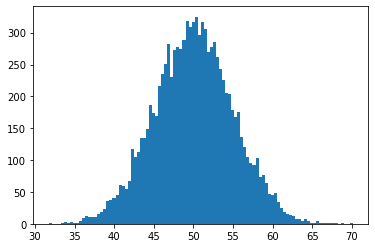

In [6]:
plt.hist(data, bins=100);

We created this data directly from the guassian but we can still see an element of 'noise'

#### Central Tendancy
---

The central tendency of a distribution refers to the middle or typical value in the distribution. 

The most common or most likely value!
 
The mean is calculated as the sum of the observations divided by the total number of observations.

$$ \text{mean(x)} = \frac{1}{n} \sum_{i=1}^n x_i$$

In [7]:
mean = np.mean(data)
mean

50.04886328349552

This is actually pretty close to our desired mean of 50.

In [10]:
median = np.median(data)
median

50.04227027048377

The result is not too dissimilar from the mean because the sample has a Gaussian distribution. 

If the data had a different (non-Gaussian) distribution, the median may be very different from the mean 

...and perhaps a better reflection of the central tendency of the underlying population.

#### Variance
---

The variance refers to how much on average that observations 'vary' from the mean value

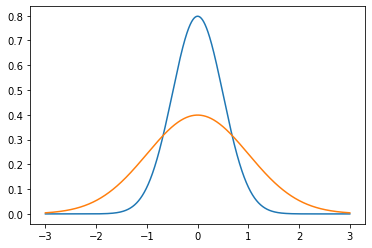

In [13]:
plt.plot(x_axis, norm.pdf(x_axis, 0, 0.5)) 
plt.plot(x_axis, norm.pdf(x_axis, 0, 1));

The blue with a low variance grouped around the mean and...

...the orange with a higher variance with more spread.

The variance is calculated as the... 

...average squared difference of each observation from the sample mean:

$$ \text{variance(x)} = \frac{1}{n-1} \sum_{i=1}^n (x - \bar{x})^2 $$

Where variance is often denoted as $s^2$ or the lowercase Greek letter sigma $\sigma^2$

In [14]:
np.var(data)

24.93932903879117

We usually take the square root of the variance, the Standard Deviation...

$$ \text{stdev(x)} = \sqrt{\text{variance(x)}}$$



In [15]:
np.std(data)

4.993929218440242

...this is also very close to the value (5) we chose!

### Simple Data Visualisation
---

Data visualization provides an important suite of tools for gaining a qualitative understanding. 

Can be helpful when exploring a dataset, helping with identifying patterns, corrupt data, outliers etc.

#### Line plot

Line plots are useful for presenting sequence data where there is an ordering between observations. 

The following creates a sequence of 100 values as the x-axis and a sine wave as a function of the x-axis 

The results are plotted as a line plot...

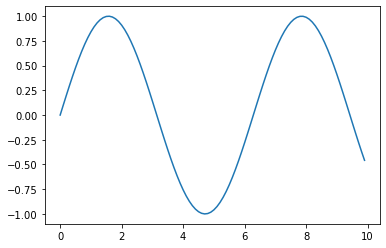

In [19]:
x = [x * 0.1 for x in range(100)] 
y = np.sin(x)
plt.plot(x, y);

#### Bar Chart

A bar chart is generally used to present relative quantities for multiple categories. 

The x-axis represents the categories and are spaced evenly. 

The y-axis represents the quantity for each category.

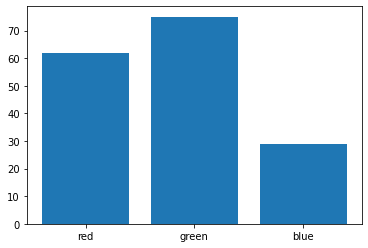

In [24]:
x = ['red', 'green', 'blue']
y = [np.random.randint(0, 100), np.random.randint(0, 100), np.random.randint(0, 100)] 
plt.bar(x, y);

#### Histogram Plot

A histogram plot is generally used to summarize the distribution of a data sample. 

The x-axis represents discrete bins or intervals for the observations.

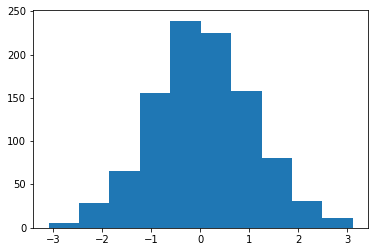

In [27]:
x = np.random.randn(1000)
plt.hist(x);

we can change the number of bins to be more granular...

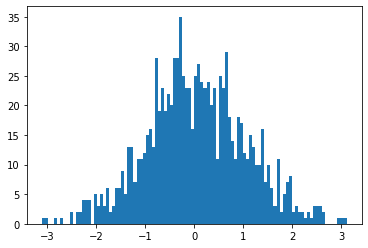

In [28]:
plt.hist(x, bins=100);

#### Box Plot

A boxplot is generally used to summarize the distribution of a data sample

A box is drawn to summarize the middle 50% of the data. This is called the interquartile range, or IQR. 

The median, or 50th percentile, is drawn with a line. 

The whiskers are calculated as 1.5×IQR i.e. expected range of sensible values in the distribution. 

Observations outside the whiskers might be outliers and are drawn with small circles.

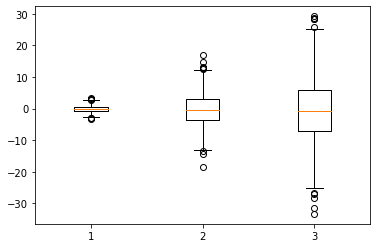

In [4]:
x = [np.random.randn(1000), 5 * np.random.randn(1000), 10 * np.random.randn(1000)]
plt.boxplot(x);

#### Scatter Plot

A scatterplot is generally used to summarize the relationship between two paired data samples.

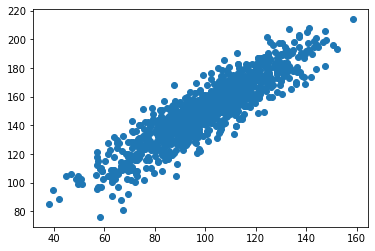

In [7]:
x = 20 * np.random.randn(1000) + 100
y = x + (10 * np.random.randn(1000) + 50)
plt.scatter(x, y);

### Law of Large Numbers
---

The law of large numbers supports the intuition that the sample becomes more representative of the population as its size is increased.

The law of large numbers is a theorem from probability and statistics that suggests that the average result from repeating an experiment multiple times will better approximate the true or expected underlying result.

We can think of a trial of an experiment as one observation. The standalone and independent repetition of the experiment will perform multiple trials and lead to multiple observations. All sample observations for an experiment are drawn from an idealized population of observations.

- Observation: Result from one trial of an experiment.
- Sample: Group of results gathered from separate independent trials.
- Population: Space of all possible observations that could be seen from a trial.

Using these terms from statistics, we can say that as the size of the sample increases, the mean value of the sample will better approximate the mean or expected value in the population. As the sample size goes to infinity, the sample mean will converge to the population mean.

>... a crowning achievement in probability, the law of large numbers. This theorem says that the mean of a large sample is close to the mean of the distribution.
— Page 76, All of Statistics: A Concise Course in Statistical Inference, 2004. 

#### Independent and Identically Distributed

It is important to be clear that the observations in the sample must be independent. This means that the trial is run in an identical manner and does not depend on the results of any other trial. This is often reasonable and easy to achieve in computers, although can be difficult elsewhere (e.g. how do you achieve identically random rolls of a dice?). 

In statistics, this expectation is called independent and identically distributed, or IID, iid, or i.i.d. for short. This is to ensure that the samples are indeed drawn from the same underlying population distribution.

#### Regression to the Mean

The law of large numbers helps us understand why we cannot trust a single observation from an experiment in isolation. We expect that a single result or the mean result from a small sample is likely. A result being likely means that it is close to the central tendency, the mean of the population distribution. Similarly, an unlikely result is an observation or sample mean that is far from the central tendency. The law reminds us to repeat the experiment in order to develop a large and representative sample of observations before we start making inferences about what the result means.

As we increase the sample size, the finding or mean of the sample will move back toward the population mean, back toward the true underlying expected value. This is called regression to the mean or sometimes reversion to the mean. It is why we must be skeptical of inferences from small sample sizes, called small n.

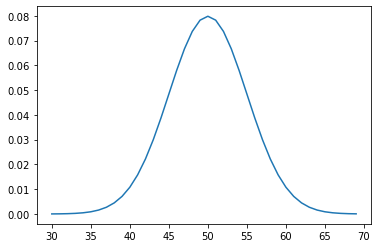

In [9]:
xaxis = np. arange(30, 70, 1)
yaxis = norm.pdf(xaxis, 50, 5) 
plt.plot(xaxis, yaxis);

Now, we can pretend to forget everything that we know about the population and make independent random samples from the population. 

We can create samples of different sizes and calculate the mean. 

Given our intuition and the law of large numbers, we expect that as the size of the sample is increased, the sample mean will better approximate the population mean. 

The example below calculates samples of different sizes, estimates the mean and plots the errors in the mean from the expected mean (50).

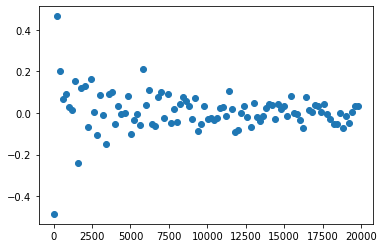

In [26]:
seed(1)
sizes = [x for x in range(10, 20000, 200)]
means = [np.mean(5 * np.random.randn(size) + 50) for size in sizes]  
plt.scatter(sizes, np.array(means)-50);

### Central Limit Theorem
---

The theorem states that as the size of the sample increases, the distribution of the mean across multiple samples will approximate a Gaussian distribution. Let’s break this down.

We can imagine performing a trial and getting a result or an observation. We can repeat the trial again and get a new independent observation. Collected together, multiple observations represents a sample of observations. A sample is a group of observations from a broader population of all possible observations that could be made given trials.

- Observation: Result from one trial of an experiment.
- Sample: Group of results gathered from separate independent trials.
- Population: Space of all possible observations that could be seen from a trial.

If we calculate the mean of a sample, it will be an estimate of the mean of the population distribution. But, like any estimate, it will be wrong and will contain some error. If we draw multiple independent samples, and calculate their means, the distribution of those means will form a Gaussian distribution. 

It is important that each trial that results in an observation be independent and performed in the same way. This is to ensure that the sample is drawing from the same underlying population distribution (i.e. an IID).

Firstly, the central limit theorem is impressive, especially as this will occur no matter the shape of the population distribution from which we are drawing samples. It demonstrates that the distribution of errors from estimating the population mean fit a distribution that the field of statistics knows a lot about. 

Secondly, this estimate of the Gaussian distribution will be more accurate as the size of the samples drawn from the population is increased. This means that if we use our knowledge of the Gaussian distribution in general to start making inferences about the means of samples drawn from a population, that these inferences will become more useful as we increase our sample size.

#### Law of Large Numbers

The central limit theorem is often confused with the law of large numbers by beginners. The law of large numbers is another different theorem from statistics. It is simpler in that it states that as the size of a sample is increased, the more accurate of an estimate the sample mean will be of the population mean. The central limit theorem does not state anything about a single sample mean; instead, it is broader and states something about the shape or the distribution of sample means.

The law of large numbers is intuitive. It is why we think that collecting more data will lead to a more representative sample of observations from the domain. The theorem supports this intuition. The central limit theorem is not intuitive. Instead, it is a finding that we can exploit in order to make claims about sample means.

A 1000 trials of rolling a dice 50 and taking the average

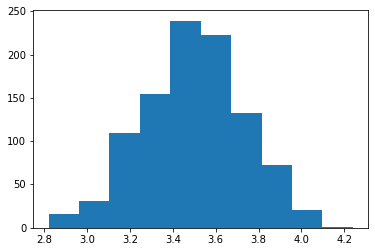

In [29]:
seed(1)
means = [np.mean(np.random.randint(1, 7, 50)) for _ in range(1000)] 
plt.hist(means);

the mean average of rolling a die...

In [32]:
(1 + 2 + 3 + 4 + 5 + 6) / 6

3.5

...and the average of our sample of means

In [33]:
round(np.mean(means), 3)

3.499